In [47]:
from skimage import io, color, morphology
from skimage.util import img_as_float, img_as_ubyte
import matplotlib.pyplot as plt
import numpy as np
import math
from skimage.filters import threshold_otsu
from skimage import segmentation
from skimage.morphology import closing, opening, erosion, dilation
from skimage.morphology import disk
from skimage import measure
from skimage.color import label2rgb, rgb2gray

In [48]:
def show_comparison(original, modified, modified_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap='gray')
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(modified, cmap='gray')
    ax2.set_title(modified_name)
    ax2.axis('off')
    io.show()

Exercise 1

C:\Users\frede\AppData\Local\Temp\ipykernel_14624\3065581121.py:10: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


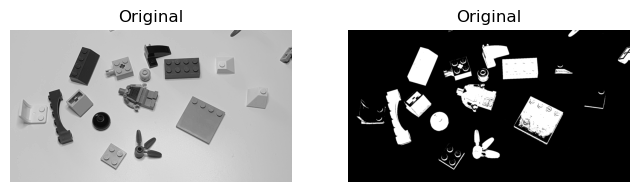

In [49]:
img_name = "lego_4_small.png"
img_path = "data/"

im_org = io.imread(img_path + img_name)
im_org = rgb2gray(im_org)

threshold = threshold_otsu(im_org)

bin_img = im_org < threshold

show_comparison(im_org, bin_img, "Original")

Exercise 2

C:\Users\frede\AppData\Local\Temp\ipykernel_14624\3065581121.py:10: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


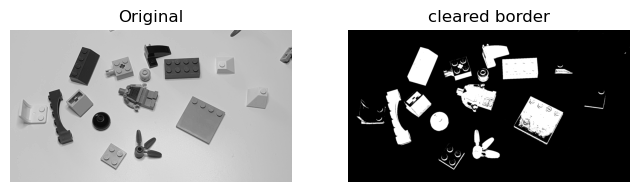

In [50]:
bin_img = segmentation.clear_border(bin_img)

show_comparison(im_org, bin_img, "cleared border")

Exercise 3

C:\Users\frede\AppData\Local\Temp\ipykernel_14624\3065581121.py:10: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


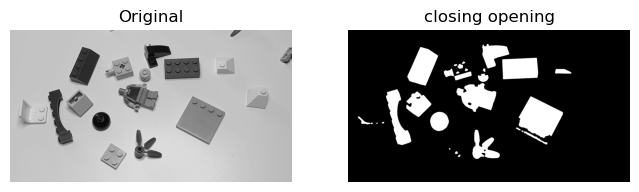

In [51]:
footprint = disk(5)
bin_img = morphology.binary_closing(bin_img, footprint)
bin_img = morphology.binary_opening(bin_img, footprint)

show_comparison(im_org, bin_img, "closing opening")

Exercise 4

In [52]:
label_img = measure.label(bin_img)
n_labels = label_img.max()
print(f"Number of labels: {n_labels}")

Number of labels: 29


Exercise 5

C:\Users\frede\AppData\Local\Temp\ipykernel_14624\3065581121.py:10: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


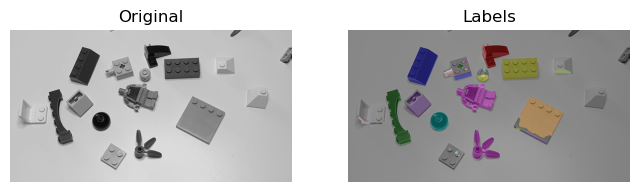

In [53]:
im_labels = label2rgb(label_img, image=im_org)
show_comparison(im_org, im_labels, "Labels")

Exercise 6

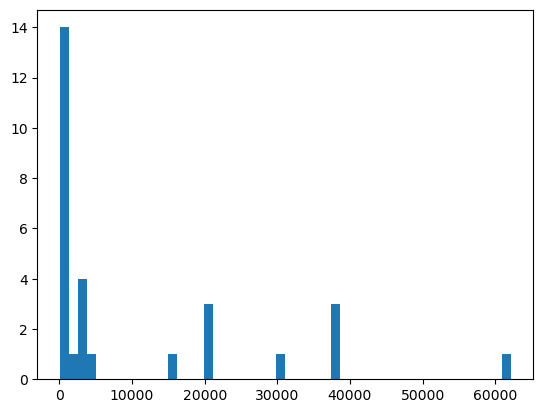

In [54]:
region_props = measure.regionprops(label_img)
areas = np.array([prop.area for prop in region_props])
plt.hist(areas, bins=50)
plt.show()

Exercise 7

Done

Exercise 8

C:\Users\frede\AppData\Local\Temp\ipykernel_14624\3946305020.py:6: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(img_gray, vmin=0, vmax=150)
C:\Users\frede\AppData\Local\Temp\ipykernel_14624\3946305020.py:8: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


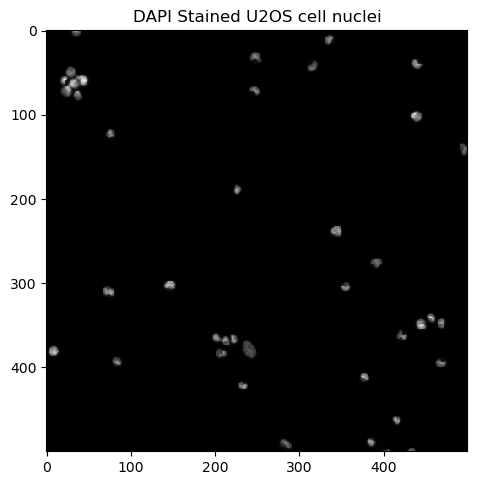

In [55]:
in_dir = "data/"
img_org = io.imread(in_dir + 'Sample E2 - U2OS DAPI channel.tiff')
# slice to extract smaller image
img_small = img_org[700:1200, 900:1400]
img_gray = img_as_ubyte(img_small)
io.imshow(img_gray, vmin=0, vmax=150)
plt.title('DAPI Stained U2OS cell nuclei')
io.show()

C:\Users\frede\AppData\Local\Temp\ipykernel_14624\54653433.py:2: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


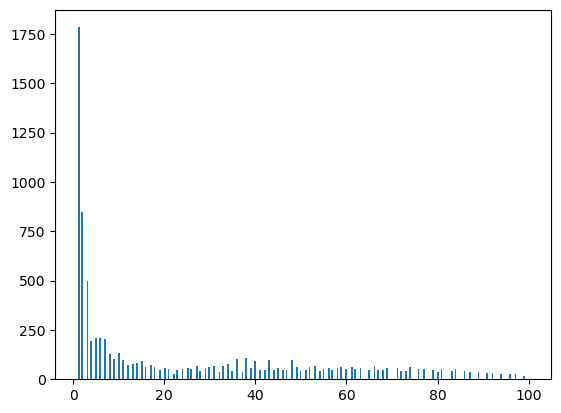

In [56]:
plt.hist(img_gray.ravel(), bins=256, range=(1, 100))
io.show()

Exercise 8

Otsu threshold: 30


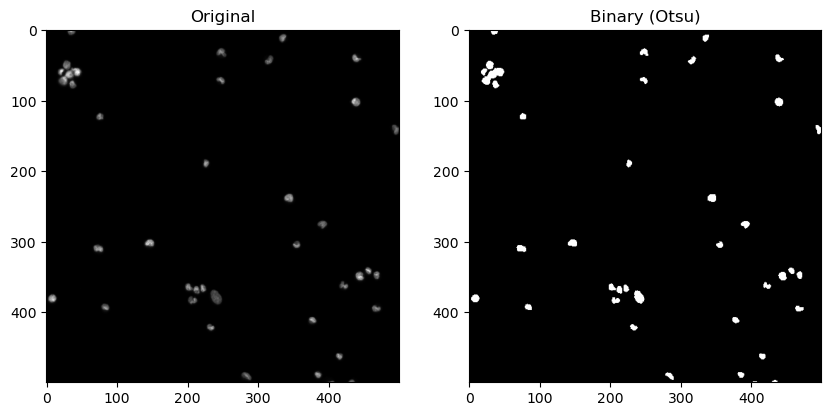

In [57]:
from skimage.filters import threshold_otsu
from skimage import morphology, measure

# Otsu threshold
thresh_val = threshold_otsu(img_gray)
print("Otsu threshold:", thresh_val)

# Apply threshold
binary = img_gray > thresh_val

# Show side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img_gray, cmap='gray')
axes[0].set_title("Original")
axes[1].imshow(binary, cmap='gray')
axes[1].set_title("Binary (Otsu)")
plt.show()


Exercise 9


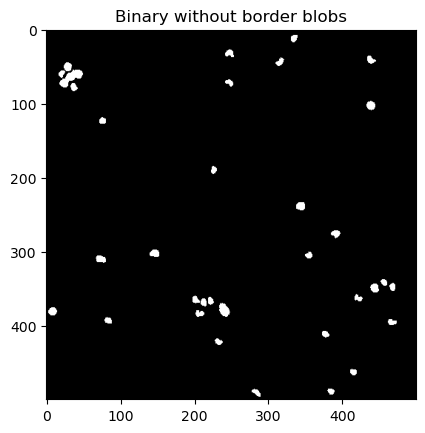

In [58]:
from skimage.segmentation import clear_border

img_clearedborder = clear_border(binary)

plt.imshow(img_clearedborder, cmap='gray')
plt.title("Binary without border blobs")
plt.show()

C:\Users\frede\AppData\Local\Temp\ipykernel_14624\3065581121.py:10: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


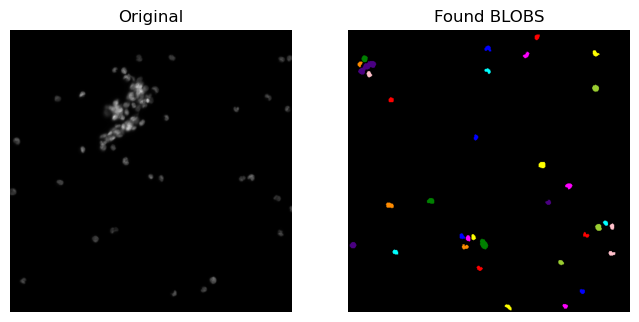

In [59]:
label_img = measure.label(img_clearedborder)
image_label_overlay = label2rgb(label_img)
show_comparison(img_org, image_label_overlay, 'Found BLOBS')

Looks relatively reasonable, except some of the cells that are touching are seen as one object. That should be fixed later

Exercise 10

In [60]:
region_props = measure.regionprops(label_img)

# Collect areas of all blobs
areas = np.array([prop.area for prop in region_props])

print("Number of objects:", len(region_props))

Number of objects: 34


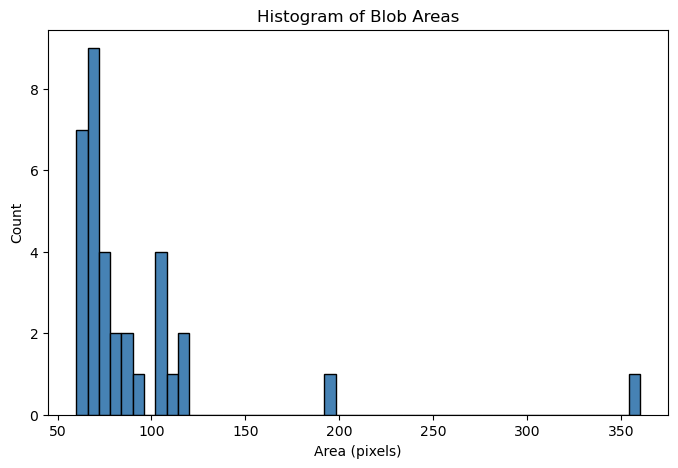

In [61]:
plt.figure(figsize=(8, 5))
plt.hist(areas, bins=50, color='steelblue', edgecolor='black')
plt.xlabel("Area (pixels)")
plt.ylabel("Count")
plt.title("Histogram of Blob Areas")
plt.show()


Exercise 11

C:\Users\frede\AppData\Local\Temp\ipykernel_14624\3065581121.py:10: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


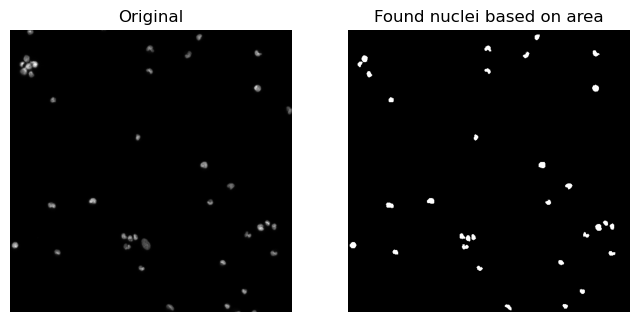

In [62]:
min_area = 10
max_area = 150

# Create a copy of the label_img
label_img_filter = label_img
for region in region_props:
	# Find the areas that do not fit our criteria
	if region.area > max_area or region.area < min_area:
		# set the pixels in the invalid areas to background
		for cords in region.coords:
			label_img_filter[cords[0], cords[1]] = 0
# Create binary image from the filtered label image
i_area = label_img_filter > 0
show_comparison(img_small, i_area, 'Found nuclei based on area')

Exercise 12

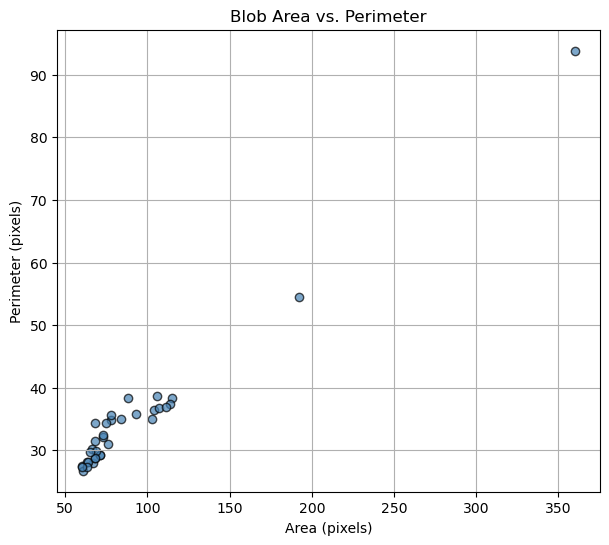

In [63]:
perimeters = np.array([prop.perimeter for prop in region_props])

plt.figure(figsize=(7, 6))
plt.scatter(areas, perimeters, c='steelblue', alpha=0.7, edgecolors='k')
plt.xlabel("Area (pixels)")
plt.ylabel("Perimeter (pixels)")
plt.title("Blob Area vs. Perimeter")
plt.grid(True)
plt.show()

Exercise 13

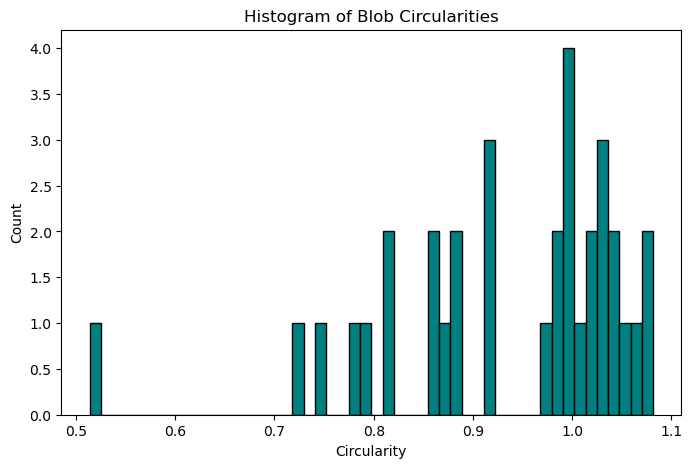

In [64]:
circularities = np.array([
    (4 * np.pi * prop.area) / (prop.perimeter ** 2) if prop.perimeter > 0 else 0
    for prop in region_props
])

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(circularities, bins=50, color='teal', edgecolor='black')
plt.xlabel("Circularity")
plt.ylabel("Count")
plt.title("Histogram of Blob Circularities")
plt.show()


In [65]:
min_area, max_area = 10, 150
min_circ= 0.7

# Create filtered label image
filtered_labels = np.zeros_like(label_img)

for i, prop in enumerate(region_props, start=1):
    area = prop.area
    perimeter = prop.perimeter
    circ = circularities[i-1]

    if (min_area < area < max_area) or (min_circ < circ):
        filtered_labels[label_img == i] = i


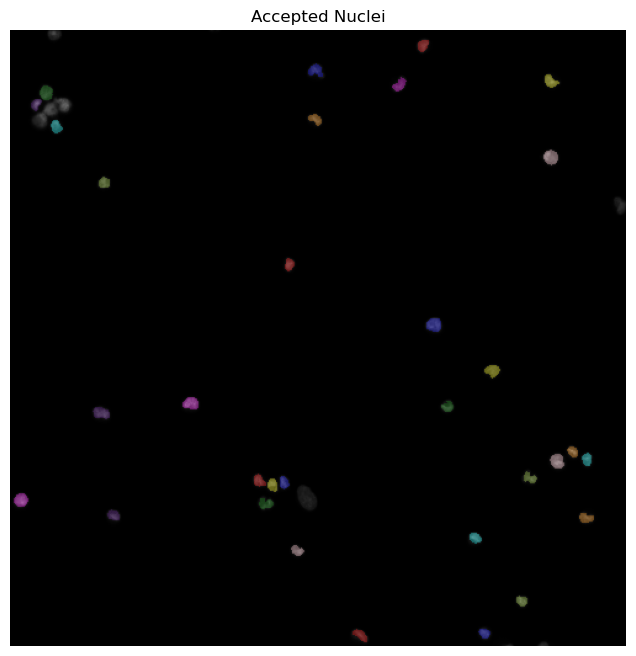

In [66]:
image_label_overlay = label2rgb(filtered_labels, image=img_gray, bg_label=0)

plt.figure(figsize=(8, 8))
plt.imshow(image_label_overlay)
plt.title("Accepted Nuclei")
plt.axis('off')
plt.show()

Exercise 14

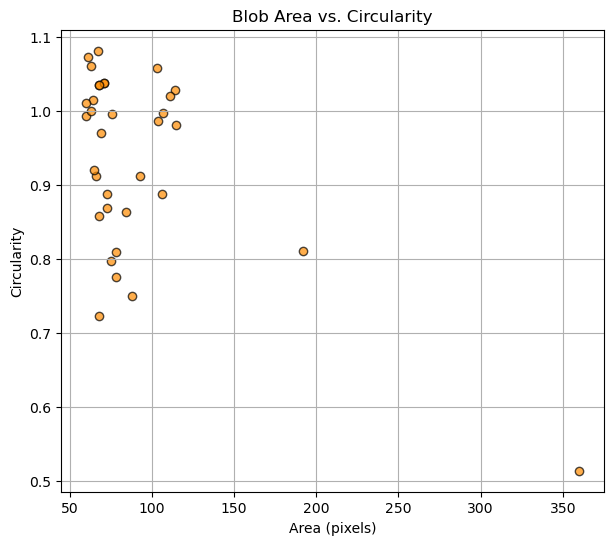

In [67]:
plt.figure(figsize=(7, 6))
plt.scatter(areas, circularities, c='darkorange', alpha=0.7, edgecolors='k')
plt.xlabel("Area (pixels)")
plt.ylabel("Circularity")
plt.title("Blob Area vs. Circularity")
plt.grid(True)
plt.show()

In [68]:
def circularity(area, perimeter):
    '''
    You may get values larger than 1 because
    we are in a "discrete" (pixels) domain. Check:

    CIRCULARITY OF OBJECTS IN IMAGES, Botterma, M.J. (2000)
    https://core.ac.uk/download/pdf/14946814.pdf
    '''
    f_circ = (4*np.pi*area)/(perimeter**2)
    return f_circ

def cell_counting(img_gray, min_area = 10, max_area = 150, min_circ = 0.7):

    # Binarization
    thres = threshold_otsu(img_gray)
    img_bin = img_gray > thres
    img_c_b = segmentation.clear_border(img_bin)

    # Label image
    label_img = measure.label(img_c_b)

    # Extract properties
    region_props = measure.regionprops(label_img)

    # Number of blobs
    n_nuclei = len(region_props)

    # Filter the label image
    label_img_filter = label_img.copy()
    for region in region_props:
        circ = circularity(region.area, region.perimeter)
        # Find the areas that do not fit our criteria
        if region.area > max_area or region.area < min_area or circ < min_circ:
            # set the pixels in the invalid areas to background
            n_nuclei = n_nuclei - 1
            for cords in region.coords:
                label_img_filter[cords[0], cords[1]] = 0

    # Create binary image from the filtered label image
    i_area = label_img_filter > 0

    return i_area, n_nuclei